# Análisis de Fourier
## Función periódica 
 Una función periódica $f(t)$ con periodo  es una función que cumple $f(t+\tau)=f(t)$ para todo $t$.

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/167d2801f5e999a5477d4b497f6e35553c677d33/Clases/Imagenes/Fourier1.png?raw=true" width="500">
</center>
<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/167d2801f5e999a5477d4b497f6e35553c677d33/Clases/Imagenes/Fourier2.png?raw=true" width="500">
</center><center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/167d2801f5e999a5477d4b497f6e35553c677d33/Clases/Imagenes/Fourier3.png?raw=true" width="500">
</center>




El término fundamental de este tipo de ecuaciones es de la forma

$$f (t) = A_0 + C_1cos(\omega_0t + \theta)\qquad\ldots\qquad(1)$$

</center><center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/167d2801f5e999a5477d4b497f6e35553c677d33/Clases/Imagenes/Fourier4.png?raw=true" width="500">
</center>
https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/167d2801f5e999a5477d4b497f6e35553c677d33/Clases/Imagenes/Fourier5.png

El valor promedio por encima del eje de las abscisas $A_0$.
La amplitud de la oscialación $C_1$.
La frecuencia angula  que esta relacionada con la frecuencia y el periodo de la forma $\omega_0=2\pi f=2\pi\frac{1}{T}$.
La fase o el ángulo de desplazamiento $\theta$ que desplaza toda la curva sobre la horizontal.

La ecuación (1) también trae la información de una sinusoidal (ejercicio 1. Hint: usa el coseno de la suma de ángulos). De tal forma que podemos expresar esta ecuación de la forma 

$$f(t) = A_0 + A_1cos(\omega_0 t ) + B_1sen(\omega_0 t ) + e\qquad\ldots\qquad(2)$$ 
### ___________
### Ejercicio 1
Usando propiedades de las funciones trigonométricas y usando la ecuación (1) obten la expresión de la ecuación (2).
### ___________
que es posible linealizar con la forma $y = a_0z_0 + a_1z_1 + a_2z_2 + \cdot  \cdot  \cdot  + a_mz_m + e$ en un espacio de $m$ dimensiones y sobre la cual es posible aplicar **mínimos cuadrados** para ajustar una recta; donde $z_0=1$, $z_1=cos(\omega_0t)$, $z_2=sen(\omega_0t)$ y todas las demas $z_3=...=z_m=0$.
Los coeficientes son:

$A_0=\frac{\sum_i f(t_i)}{N}$

$A_1=\frac{2}{N}\sum_i f(t_i)cos(\omega_0t_i)$

$B_1=\frac{2}{N}\sum_i f(t_i)sen(\omega_0t_i)$

como esta función es peródica, entonces es posible tomar solamente $N$ puntos en el intervalo $\Delta t$ tal que el periodo de la función $T=(N-1)\Delta t$. Es decir, es suficiente estos $N-1$ puntos para poder describir la función por completo.

# Ejemplo 1
Para la tabla de datos presentada, obtener los coeficientes de Fourier considerando que representan solo un periodo de la función.


In [3]:
import numpy as np
import pandas as pd

# Definir los datos de la tabla como vectores
t = np.array([0, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1.05, 1.20, 1.35])
y = np.array([2.200, 1.595, 1.031, 0.722, 0.786, 1.200, 1.805, 2.369, 2.678, 2.614])
y_cos = np.array([2.200, 1.291, 0.319, -0.223, -0.636, -1.200, -1.460, -0.732, 0.829, 2.114])
y_sen = np.array([0.000, 0.938, 0.980, 0.687, 0.462, 0.000, -1.061, -2.253, -2.547, -1.536])

# Crear una tabla con los datos
tabla_datos = pd.DataFrame({
    't': t,
    'y': y,
    'y_cos': y_cos,
    'y_sin': y_sen
})

# Mostrar la tabla
print("Tabla de datos:")
print(tabla_datos)

# Calcular las sumas (última fila de la tabla original)
sumatorias = pd.DataFrame({
    'Sum_t': [np.sum(t)],
    'Sum_y': [np.sum(y)],
    'Sum_y_cos': [np.sum(y_cos)],
    'Sum_y_sin': [np.sum(y_sen)]
})

print("\nSumatorias:")
print(sumatorias)

# Calcular coeficientes de Fourier (ejemplo para el primer armónico)
N = len(t)  # Número de muestras
T = (N - 1) * (t[1] - t[0])  # Periodo
omega0 = 2 * np.pi / T  # Frecuencia fundamental (ω0 ≈ 4.654 rad/s)

a0 = np.mean(y)
a1 = 2 * np.mean(y_cos)
b1 = 2 * np.mean(y_sen)

# Mostrar resultados
print("\nCoeficientes de Fourier (primer armónico):")
print(f"a0 = {a0:.4f}")
print(f"a1 = {a1:.4f}")
print(f"b1 = {b1:.4f}")

Tabla de datos:
      t      y  y_cos  y_sin
0  0.00  2.200  2.200  0.000
1  0.15  1.595  1.291  0.938
2  0.30  1.031  0.319  0.980
3  0.45  0.722 -0.223  0.687
4  0.60  0.786 -0.636  0.462
5  0.75  1.200 -1.200  0.000
6  0.90  1.805 -1.460 -1.061
7  1.05  2.369 -0.732 -2.253
8  1.20  2.678  0.829 -2.547
9  1.35  2.614  2.114 -1.536

Sumatorias:
   Sum_t  Sum_y  Sum_y_cos  Sum_y_sin
0   6.75   17.0      2.502      -4.33

Coeficientes de Fourier (primer armónico):
a0 = 1.7000
a1 = 0.5004
b1 = -0.8660



Este ajuste solo considera una única frecuencia de oscilación. Si el fenómeno se pudiese describir con $m$ múltiplos enteros de esta frecuencia entonces la ecuación general del modelo sería

$$f (t) = A_0 + A_1cos(\omega_0 t) + B_1sen(\omega_0 t) + A_2cos(2\omega_0 t) + B_2sen(2\omega_0 t )+ \cdot  \cdot  \cdot  + A_mcos(m\omega_0 t) + B_msen(m\omega_0 t)$$

donde los coeficientes se obtienen por medio de minimos cuadrados como

$A_0=\frac{\sum_i f(t_i)}{N}$

$A_j=\frac{2}{N}\sum_i f(t_i)cos(j\omega_0 t_i)$

$B_j=\frac{2}{N}\sum_i f(t_i)sen(j\omega_0 t_i)$

A los valores $j\omega_0$ donde $j=1,2,...,m$ se le conocen como los armónicos de la función ajustada.

In [4]:
import numpy as np
import pandas as pd

# Datos de la tabla
t = np.array([0, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1.05, 1.20, 1.35])
y = np.array([2.200, 1.595, 1.031, 0.722, 0.786, 1.200, 1.805, 2.369, 2.678, 2.614])

# Parámetros
N = len(t)          # Número de muestras
T = np.max(t)       # Periodo (T = 1.35)
omega0 = 2 * np.pi / T  # Frecuencia fundamental (ω0 ≈ 4.654 rad/s)

# Cálculo de términos para el segundo armónico
y_cos2 = y * np.cos(2 * omega0 * t)  # y * cos(2ω0t)
y_sin2 = y * np.sin(2 * omega0 * t)  # y * sin(2ω0t)

# Coeficientes del segundo armónico
a2 = 2 * np.mean(y_cos2)
b2 = 2 * np.mean(y_sin2)

# Mostrar resultados
print("Coeficientes del segundo armónico:")
print(f"a2 = {a2:.4f}")
print(f"b2 = {b2:.4f}")

# Opcional: Crear tabla para visualización
tabla_datos = pd.DataFrame({
    't': t,
    'y': y,
    'y_cos2': y_cos2,
    'y_sin2': y_sin2
})
print("\nTabla con términos del segundo armónico:")
print(tabla_datos)

# Sumatorias (verificación)
print(f"\nSum(y_cos2) = {np.sum(y_cos2):.4f}")
print(f"Sum(y_sin2) = {np.sum(y_sin2):.4f}")

Coeficientes del segundo armónico:
a2 = 0.5238
b2 = -0.0640

Tabla con términos del segundo armónico:
      t      y    y_cos2        y_sin2
0  0.00  2.200  2.200000  0.000000e+00
1  0.15  1.595  0.276969  1.570768e+00
2  0.30  1.031 -0.968823  3.526228e-01
3  0.45  0.722 -0.361000 -6.252703e-01
4  0.60  0.786  0.602111 -5.052311e-01
5  0.75  1.200  0.919253  7.713451e-01
6  0.90  1.805 -0.902500  1.563176e+00
7  1.05  2.369 -2.226132 -8.102457e-01
8  1.20  2.678  0.465030 -2.637315e+00
9  1.35  2.614  2.614000 -1.280491e-15

Sum(y_cos2) = 2.6189
Sum(y_sin2) = -0.3202


Graficando los ajustes

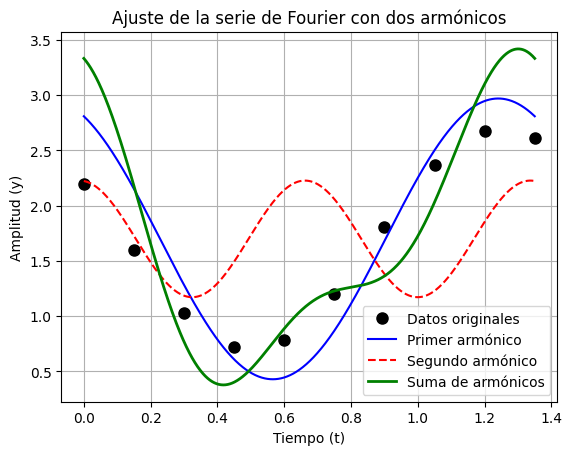

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de la tabla
t = np.array([0, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1.05, 1.20, 1.35])
y = np.array([2.200, 1.595, 1.031, 0.722, 0.786, 1.200, 1.805, 2.369, 2.678, 2.614])

# Parámetros
N = len(t)           # Número de muestras
T = np.max(t)        # Periodo (T = 1.35)
omega0 = 2 * np.pi / T  # Frecuencia fundamental (ω0 ≈ 4.654 rad/s)

# Cálculo de coeficientes del primer armónico
y_cos1 = y * np.cos(omega0 * t)
y_sin1 = y * np.sin(omega0 * t)
a0 = np.mean(y)
a1 = 2 * np.mean(y_cos1)
b1 = 2 * np.mean(y_sin1)

# Cálculo de coeficientes del segundo armónico
y_cos2 = y * np.cos(2 * omega0 * t)
y_sin2 = y * np.sin(2 * omega0 * t)
a2 = 2 * np.mean(y_cos2)
b2 = 2 * np.mean(y_sin2)

# Crear un vector de tiempo más denso para las curvas suaves
t_dense = np.linspace(0, T, 1000)

# Ajuste del primer armónico
y_fit1 = a0 + a1 * np.cos(omega0 * t_dense) + b1 * np.sin(omega0 * t_dense)

# Ajuste del segundo armónico
y_fit2 = a0 + a2 * np.cos(2 * omega0 * t_dense) + b2 * np.sin(2 * omega0 * t_dense)

# Suma de ambos armónicos
y_fit_total = (a0 + a1 * np.cos(omega0 * t_dense) + b1 * np.sin(omega0 * t_dense)
               + a2 * np.cos(2 * omega0 * t_dense) + b2 * np.sin(2 * omega0 * t_dense))

# Graficar los datos y los ajustes
plt.figure()
plt.grid(True)
plt.title('Ajuste de la serie de Fourier con dos armónicos')

# Datos originales
plt.plot(t, y, 'ko', markersize=8, label='Datos originales')

# Ajuste del primer armónico
plt.plot(t_dense, y_fit1, 'b-', linewidth=1.5, label='Primer armónico')

# Ajuste del segundo armónico
plt.plot(t_dense, y_fit2, 'r--', linewidth=1.5, label='Segundo armónico')

# Suma de ambos armónicos
plt.plot(t_dense, y_fit_total, 'g-', linewidth=2, label='Suma de armónicos')

# Configuración del gráfico
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud (y)')
plt.legend(loc='best')
plt.show()

Las series de Fourier no solo sirven para ajustar datos que pueden tener una periodicidad. También se ocupa para transformar funciones continuas  que parecen ser periodicas a funciones seno y coseno de la forma
$$f (t) = a_0 + \sum_{k=1}^{\infty}[a_kcos(k\omega_0 t ) + b_ksen(k\omega_0 t )]$$

donde de nuevo los valor $k$ definen los armónicos. En este caso la evaluación de cada coeficiente se realiza para $f(t)$ con el valor de $t$ para el intervalo correspondiente.
Para poder evaluar los coeficientes necesitamos en cálculo contínuo de las sumas, por lo que las coeficientes ahora son usando una integral en lugar de una suma sobre el periodo de tiempo:

$a_0=\frac{2}{T}\int_0^Tf(t)dt$

$a_k=\frac{2}{T}\int_0^Tf(t)cos(k\omega_0t)dt$

$b_k=\frac{2}{T}\int_0^Tf(t)sen(k\omega_0t)dt$

### ___________
### Ejercicio 2

Una ecuación de onda rectangular se puede describir como
$f(t)=\left\{\begin{array}{rr}-1&-T/2<t<-T/4\\
1&-T/4<t<-T/4\\
-1&-T/4<t<-T/2\\
 \end{array}\right. $
con altura de 2 unidades y periodo $T=2\pi/ \omega_0$.

</center><center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/167d2801f5e999a5477d4b497f6e35553c677d33/Clases/Imagenes/Fourier5.png?raw=true" width="500">
</center>

### ___________

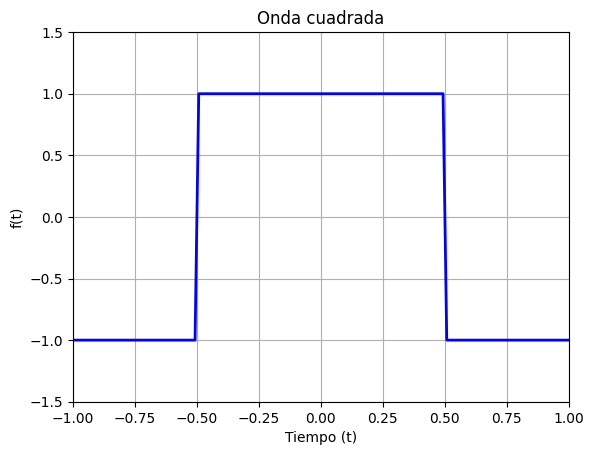

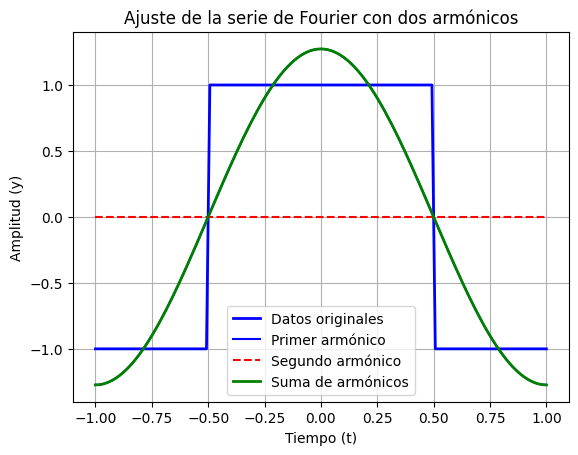

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el periodo T
T = 2  # Puedes ajustar T según necesites
omega0 = 2 * np.pi / T
N = 45  # número de datos
k = 2  # número de armónicos

# Crear un vector de tiempo para un periodo
t = np.linspace(-T / 2, T / 2, N * 3)

# Inicializar la función
f = np.zeros_like(t)

# Definir los intervalos
f[np.logical_and(t >= -T / 2, t < -T / 4)] = -1
f[np.logical_and(t >= -T / 4, t < T / 4)] = 1
f[np.logical_and(t >= T / 4, t <= T / 2)] = -1

# Graficar la onda cuadrada
plt.figure()
plt.plot(t, f, 'b-', linewidth=2)
plt.grid(True)
plt.xlabel('Tiempo (t)')
plt.ylabel('f(t)')
plt.title('Onda cuadrada')
plt.ylim([-1.5, 1.5])  # Ajustar los límites del eje y
plt.xlim([-T / 2, T / 2])  # Mostrar solo un periodo

# Calcular el coeficiente a0
a0 = (2 / T) * np.trapezoid(f, t)

# Calcular los coeficientes an y bn
an = np.zeros(k)
bn = np.zeros(k)

for n in range(1, k + 1):
    an[n - 1] = (2 / T) * np.trapezoid(f * np.cos(n * omega0 * t), t)
    bn[n - 1] = (2 / T) * np.trapezoid(f * np.sin(n * omega0 * t), t)

# Ajuste del primer armónico
y_fit1 = a0 + an[0] * np.cos(omega0 * t) + bn[0] * np.sin(omega0 * t)

# Ajuste del segundo armónico
y_fit2 = a0 + an[1] * np.cos(2 * omega0 * t) + bn[1] * np.sin(2 * omega0 * t)

# Suma de ambos armónicos
y_fit_total = (a0 + an[0] * np.cos(omega0 * t) + bn[0] * np.sin(omega0 * t) +
               an[1] * np.cos(2 * omega0 * t) + bn[1] * np.sin(2 * omega0 * t))

# Graficar los datos y los ajustes
plt.figure()
plt.grid(True)

# Datos originales
plt.plot(t, f, 'b-', linewidth=2, label='Datos originales')

# Ajuste del primer armónico
plt.plot(t, y_fit1, 'b-', linewidth=1.5, label='Primer armónico')

# Ajuste del segundo armónico
plt.plot(t, y_fit2, 'r--', linewidth=1.5, label='Segundo armónico')

# Suma de ambos armónicos
plt.plot(t, y_fit_total, 'g-', linewidth=2, label='Suma de armónicos')

# Configuración del gráfico
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud (y)')
plt.title('Ajuste de la serie de Fourier con dos armónicos')
plt.legend(loc='best')
plt.show()



Las series de Fourier se pueden expresar usando la formaula de Euler 
$$e^{\,\pm \,i\, x}=\text{cos}\,(x)\pm i\,\text{sen}\,(x)$$
sustituyendo esta expresión en la serie de Fourier obtenemos que 
$$f(t)=\sum_{k=-\infty}^{\infty}c_ke^{ik\omega_0t}\qquad \ldots\qquad(3)
$$
y donde el coeficiente es
$$c_k=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)e^{-ik\omega_0t}dt\qquad\ldots\qquad(4)$$

# ___________________________________________________________

## Transformada de Fourier
De las cuatro variables con las que podemos representar una función cosenoidal existe una que aun no se ha usado. La frecuencia $\omega_0$ también puede variar para poder construir una suscesión de funciones con las cuales describir una función periódica. Esta variación, de la forma $ik\omega_o$, está representada en la constance $c_k(ik\omega_0)$. Es decir, la constante es ahora una función que depende de la frecuencia. Esta nueva función esta representada en el eje $f-f(t)$ de la figura en (a).

</center><center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/4900c6da42c835dc3175dfa3da0424bb466e9293/Clases/Imagenes/Fourier6.png?raw=true" width="500">
</center>

La ecuación (3) entonces se puede ver como 

$$f(t)=\frac{1}{2\pi}\sum_{k=-\infty}^{\infty}F(ik\omega_0)e^{ik\omega_0t}$$

y que al observar el caso continuo, la suma se transforma en una integral de la forma

$$f(t)=\frac{1}{2\pi}\int_{-\infty}^{\infty}F(ik\omega_0)e^{ik\omega_0t}dt\qquad\ldots\qquad(6)$$

y donde ahora la nueva función que depende de la frecuencia es

$$F(ik\omega_0)=\int_{-\infty}^{\infty}f(t)e^{-ik\omega_0t}dt\qquad\ldots\qquad(7)$$

## Transforma discreta de Fourier
A la ecuacion (6) se le conocen como las transformada de Fourier y a la ecuación (7) como la transformada inversa. Cada una en el dominio del tiempo y en el dominio de la frecuencia, respectivamente. Ambas funciones son continuas por lo que en un principio es util observar primero ambas funciones en su forma discreta. De esta forma escribimos la transformada de Fourier y su inversa en su forma discreta como:

$$F_k=\sum_{j=0}^{n-1}f_je^{-ik\omega_0j}\qquad\text{para}\,k=0...n-1$$

$$f_j=\frac{1}{n}\sum_{k=0}^{n-1}F_ke^{ik\omega_0j}\qquad\text{para}\,j=0...n-1$$

donde $\omega_0=\frac{2\pi}{n}$ y el muestreo de los datos se ve como en la figura

</center><center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/4900c6da42c835dc3175dfa3da0424bb466e9293/Clases/Imagenes/Fourier7.png?raw=true" width="500">
</center>

## Ejemplo 2

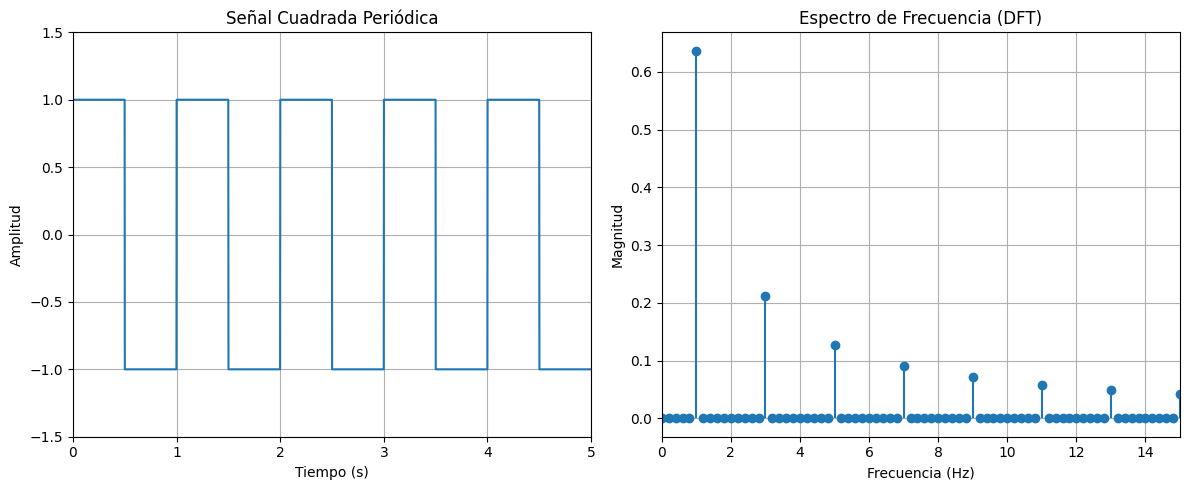

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

# 1. Definir parámetros de la señal
Fs = 1000           # Frecuencia de muestreo (Hz)
T = 5               # Duración total (segundos)
t = np.arange(0, T, 1/Fs)  # Vector de tiempo
N = len(t)          # Número de muestras

# 2. Generar señal cuadrada periódica
f0 = 1              # Frecuencia fundamental (Hz)
anch_ciclo = 50     # Ciclo de trabajo (%)
x = square(2 * np.pi * f0 * t, duty=anch_ciclo / 100)

# 3. Calcular la DFT manualmente
X = np.zeros(N, dtype=complex)  # Inicializar vector de transformada

for k in range(N):
    sums = 0
    for n in range(N):
        # Aplicar la fórmula DFT directamente
        sums += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
    X[k] = sums

# 4. Reorganizar el espectro (como fftshift)
X_shifted = np.concatenate((X[N//2:], X[:N//2]))
X_mag = np.abs(X_shifted) / N  # Magnitud normalizada

# 5. Crear vector de frecuencias
frequencies = np.fft.fftshift(np.fft.fftfreq(N, d=1/Fs))

# 6. Graficar los resultados
plt.figure(figsize=(12, 5))

# Gráfica de la señal en el tiempo
plt.subplot(1, 2, 1)
plt.plot(t, x, linewidth=1.5)
plt.title('Señal Cuadrada Periódica')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim([0, T])
plt.ylim([-1.5, 1.5])
plt.grid(True)

# Gráfica del espectro de frecuencia    
plt.subplot(1, 2, 2)
# plt.stem(frequencies, X_mag, 'C0', markerfmt='o', basefmt=" ", linefmt='C0-', use_line_collection=True)
plt.stem(frequencies, X_mag, 'C0', markerfmt='o', basefmt=" ", linefmt='C0-')
plt.xlim([0, 15])
plt.title('Espectro de Frecuencia (DFT)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)

plt.tight_layout()
plt.show()

### ___________
### Ejercicio 3
El cálculo de esta transformada es mas facil a través de sustituir la exponencial con la identidad de Euler, es decir
 $$F_k=\sum_{j=0}^{n-1}[\;f_j\,\text{cos}(k \omega_0\,j)-i\,f_j\,\text{sen}(k\omega_0\,j)\,]\qquad\text{para}\,k=0...n-1$$
 $$f_j=\frac{1}{n}\sum_{k=0}^{n-1}[\,F_k\,\text{cos}(k\omega_0\,j)+i\,F_k\,\text{sen}(k\omega_0\,j)\,]\qquad\text{para}\,j=0...n-1$$
Utiliza las ecuaciones anteriores para modificar el programa en el Ejemplo 2.
### ___________
Otra forma de expresar los valores en el dominio de las frecuencias es calcular la **potencia** asociada a cada componente de frecuencia, es decir

$$P=\frac{1}{T}\int_{-T/2}^{T/2}f^2(t)dt=\sum_{k=-\infty}^{\infty}|F_k|^2$$

Este término respresenta el doble de la magnitud de las componentes de la frecuencia de cada valor del  armónico real de  como
$$p_k=2|F_k|^2$$

La gráfica de potencia contra frecuencia es util para identificar las frecuencias dominantes.
### ___________
### Ejercicio 4
En 1848, Johann Rudolph Wolf ideó un método para cuantificar la actividad solar contando el número de manchas individuales y grupos de manchas en la superficie solar. Calculó una cantidad, ahora llamada número de manchas solares de Wolf, sumando 10 veces el número de grupos más el recuento total de manchas individuales. El conjunto de datos para el número de manchas solares se remonta a 1700 (sunspot.dat). Basándose en los primeros registros históricos, Wolf determinó que la duración del ciclo era de 11.1 años. Utiliza un análisis de Fourier para confirmar este resultado aplicando una FFT a los datos.

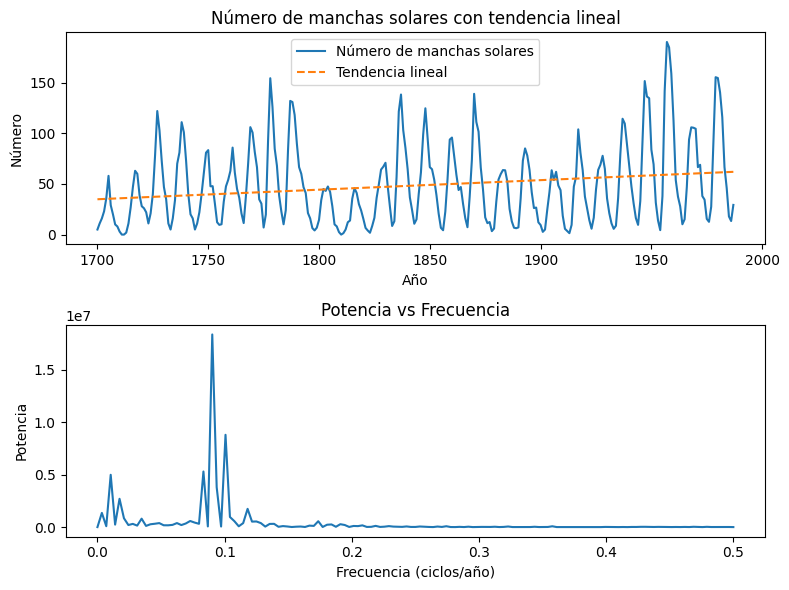

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos desde un archivo .dat
data = np.loadtxt('sunspot.dat')
year = data[:, 0]
number = data[:, 1]
n = len(number)

# Ajuste lineal (tendencia lineal)
a = np.polyfit(year, number, 1)
linear_trend = np.polyval(a, year)

# Remover tendencia lineal
ft = number - linear_trend

# Transformada rápida de Fourier (FFT)
F = np.fft.fft(ft)
fs = 1  # Frecuencia de muestreo (1 ciclo por año)
frequencies = np.arange(0, n // 2 + 1) * fs / n
power = np.abs(F[:n // 2 + 1])**2

# Graficar resultados
plt.figure(figsize=(8, 6))

# Gráfica de los datos originales
plt.subplot(2, 1, 1)
plt.plot(year, number, label="Número de manchas solares")
plt.plot(year, linear_trend, label="Tendencia lineal", linestyle='--')
plt.legend()
plt.xlabel("Año")
plt.ylabel("Número")
plt.title("Número de manchas solares con tendencia lineal")

# Gráfica de potencia vs frecuencia
plt.subplot(2, 1, 2)
plt.plot(frequencies, power)
plt.xlabel("Frecuencia (ciclos/año)")
plt.ylabel("Potencia")
plt.title("Potencia vs Frecuencia")

plt.tight_layout()
plt.show()


Utilizando los datos mas recientes obten una mejor aproximación para el periodo de los ciclos de Wolf.

In [12]:
import numpy as np
import requests

# URL del archivo de datos
url = 'http://www.sidc.be/silso/INFO/snmtotcsv.php'
filename = 'sunspot_data.csv'

# Descargar el archivo desde la URL y guardarlo localmente
response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)

# Leer el archivo descargado en un array numpy, usando ';' como delimitador
data = np.loadtxt(filename, delimiter=';')

# Extraer las columnas necesarias
t_midmonth = data[:, 2]  # Columna 3: fecha del medio del mes (en fracción de año)
f = data[:, 3]           # Columna 4: números de manchas solares

### ___________
### Ejercicio 5
El archivo de ejemplo quake.mat contiene datos de 200 Hz del terremoto de Loma Prieta del 17 de octubre de 1989 en las montañas de Santa Cruz. Los datos son cortesía de Joel Yellin del Laboratorio Sismológico Charles F. Richter de la Universidad de California en Santa Cruz.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde un archivo .dat
# Suponiendo que quake.dat contiene tres columnas: 'e', 'n', 'v'
data = np.loadtxt('quake.dat')
e = data[:, 0]  # Columna 1: Este-Oeste
n = data[:, 1]  # Columna 2: Norte-Sur
v = data[:, 2]  # Columna 3: Vertical

# Crear el vector de tiempo
sampling_rate = 200  # Frecuencia de muestreo (Hz)
time = (1 / sampling_rate) * np.arange(1, len(e) + 1)  # Vector de tiempo en segundos

# Crear un DataFrame (similar a un timetable en MATLAB)
var_names = ["EastWest", "NorthSouth", "Vertical"]
quake_data = pd.DataFrame({
    "Time": time,
    "EastWest": e,
    "NorthSouth": n,
    "Vertical": v
})

# Convertir la columna de tiempo a pandas Timedelta para manejar intervalos
quake_data["Time"] = pd.to_timedelta(quake_data["Time"], unit="s")
quake_data.set_index("Time", inplace=True)

# Graficar Aceleración Este-Oeste
plt.figure()
plt.plot(quake_data.index.total_seconds(), quake_data["EastWest"], label="Este-Oeste")
plt.title("Aceleración Este-Oeste")
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración")
plt.grid(True)

# Escalar las variables
quake_data *= 0.098

# Definir el rango de tiempo para extraer los datos
t1 = pd.Timedelta(seconds=8)
t2 = pd.Timedelta(seconds=15)

# Agregar líneas verticales en la gráfica
plt.axvline(t1.total_seconds(), color="r", linewidth=2, linestyle="--", label="t1=8s")
plt.axvline(t2.total_seconds(), color="g", linewidth=2, linestyle="--", label="t2=15s")
plt.legend()
plt.show()

# Filtrar los datos dentro del rango [t1, t2]
quake_data_8_to_15 = quake_data.loc[t1:t2, :]

# Graficar datos en el rango [t1, t2]
plt.figure()
plt.plot(quake_data.index.total_seconds(), quake_data["EastWest"], label="Este-Oeste (Escalado)")
plt.title("Aceleración Este-Oeste (Escalada)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración")
plt.grid(True)
plt.show()

# Crear una disposición de gráficos con 3 paneles
plt.figure()
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Tile 1: Aceleración Este-Oeste
axs[0].plot(quake_data_8_to_15.index.total_seconds(), quake_data_8_to_15["EastWest"], color="b", label="Este-Oeste")
axs[0].set_ylabel("Este-Oeste")
axs[0].set_title("Aceleración")
axs[0].grid(True)

# Tile 2: Aceleración Norte-Sur
axs[1].plot(quake_data_8_to_15.index.total_seconds(), quake_data_8_to_15["NorthSouth"], color="r", label="Norte-Sur")
axs[1].set_ylabel("Norte-Sur")
axs[1].grid(True)

# Tile 3: Aceleración Vertical
axs[2].plot(quake_data_8_to_15.index.total_seconds(), quake_data_8_to_15["Vertical"], color="g", label="Vertical")
axs[2].set_ylabel("Vertical")
axs[2].grid(True)

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()

Utiliza los datos entre los tiempos de llegada de 8 a 15 segundos y obten el espectro de potencias para cada una de las componentes.